### PCA Pareto Plot Thing?

PCA to get axis corresponding to the direction of the data.

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

In [190]:
X, _ = make_blobs(centers=2)

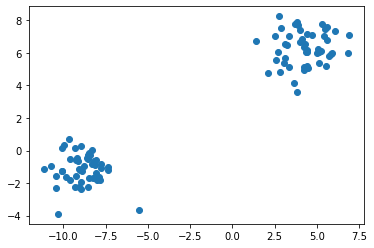

In [191]:
plt.scatter(X[:,0], X[:,1]);

In [192]:
x = X[:,0]
y = X[:,1]

In [193]:
pca = PCA(n_components=2, whiten=False)
pca.fit(np.array([x,y]).T);

In [194]:
pca.components_

array([[ 0.87216161,  0.48921787],
       [ 0.48921787, -0.87216161]])

In [195]:
from sklearn.preprocessing import normalize

In [196]:
x_t = normalize(pca.transform([[1, 0]]))[0]; x_t

array([0.38603588, 0.92248377])

In [197]:
y_t = normalize(pca.transform([[0, 1]]))[0]; y_t

array([0.44207233, 0.8969794 ])

In [198]:
transformed_error = pca.transform([
    # X error line
    [50-10, 0.5],
    [50+10, 0.5],
    # Y error line
    [50, 0.5-0.1],
    [50, 0.5+0.1]
]); transformed_error

array([[35.87947607, 22.51596834],
       [53.32270833, 32.30032566],
       [44.55217041, 27.49536316],
       [44.65001399, 27.32093084]])

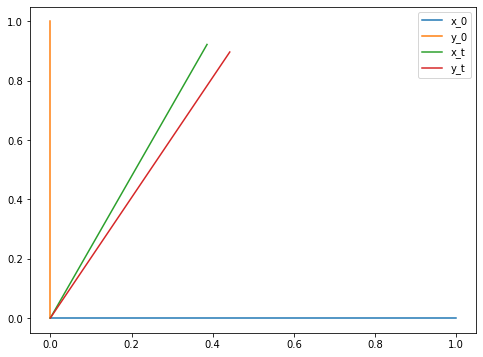

In [199]:
fig = plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 0], label='x_0')
plt.plot([0, 0], [0, 1], label='y_0')
plt.plot([0, x_t[0]], [0, x_t[1]], label='x_t')
plt.plot([0, y_t[0]], [0, y_t[1]], label='y_t')
plt.legend();

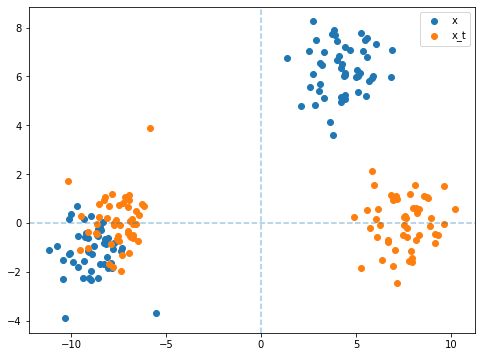

In [200]:
fig = plt.figure(figsize=(8,6))
plt.scatter(x, y, label='x')
plt.scatter(*pca.transform(X).T, label='x_t')
plt.axhline(0, ls='--', alpha=0.4)
plt.axvline(0, ls='--', alpha=0.4)
plt.legend();

In [201]:
def pca_error_points(X: np.array) -> np.array:
    """
    Given a 2d dataset returns four points representing two lines found from error bars in a PCA decomposition.
    0: x_low, 1: x_high, 2: y_low, 3: y_high
    """
    # Initialize PCA
    pca = PCA(n_components=2, whiten=True, random_state=0)
    # Remove NaN points
    non_nan = X[~np.any(np.isnan(X), axis=1)]
    # Fit PCA
    pca.fit(non_nan)
    # Transform points into PCA
    X_t = pca.transform(non_nan)
    # Calculate error bars in PCA coordinates
    x_err_pca = [np.percentile(X_t[0:,], 2.5), np.percentile(X_t[0:,], 97.5)]
    y_err_pca = [np.percentile(X_t[1:,], 2.5), np.percentile(X_t[1:,], 97.5)]
    # X Error
    x_l = [np.mean(X_t[0:,])+x_err_pca[0], np.mean(X_t[1:,])]
    x_h = [np.mean(X_t[0:,])+x_err_pca[1], np.mean(X_t[1:,])]
    # Y Error
    y_l = [np.mean(X_t[0:,]), np.mean(X_t[1:,])+y_err_pca[0]]
    y_h = [np.mean(X_t[0:,]), np.mean(X_t[1:,])+y_err_pca[1]]
    
    x_l_t, x_h_t, y_l_t, y_h_t = pca.inverse_transform([x_l, x_h, y_l, y_h])
    return x_l_t, x_h_t, y_l_t, y_h_t

err_pca [-8.681988428227992, 9.159107659778845] [-1.8284258875979942, 1.6532572303207542]
mean 1.1102230246251565e-16 6.350475700855895e-16
x_err [-2.91482005 12.9732652 ]
y_err [-2.82093867  7.16865053]


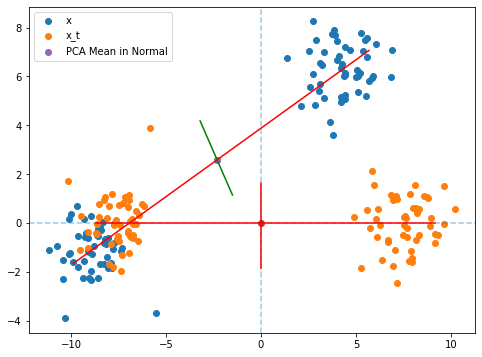

In [206]:
# Original X, input
fig = plt.figure(figsize=(8,6))
plt.scatter(x, y, label='x')

X_t = pca.transform(X).T
plt.scatter(*X_t, label='x_t')
plt.axhline(0, ls='--', alpha=0.4)
plt.axvline(0, ls='--', alpha=0.4)

plt.scatter(np.mean(x), np.mean(y)) # Normal Mean
plt.scatter(np.mean(X_t[0:,]), np.mean(X_t[1:,])) # PCA Mean

# PCA Error bars
x_err_pca = [np.percentile(X_t[0:,], 2.5), np.percentile(X_t[0:,], 97.5)]
y_err_pca = [np.percentile(X_t[1:,], 2.5), np.percentile(X_t[1:,], 97.5)]
print("err_pca", x_err_pca, y_err_pca)
print("mean", np.mean(X_t[0:,]), np.mean(X_t[1:,]))
# X Error
x_l = [np.mean(X_t[0:,])+x_err_pca[0], np.mean(X_t[1:,])]
x_h = [np.mean(X_t[0:,])+x_err_pca[1], np.mean(X_t[1:,])]
# Y Error
y_l = [np.mean(X_t[0:,]), np.mean(X_t[1:,])+y_err_pca[0]]
y_h = [np.mean(X_t[0:,]), np.mean(X_t[1:,])+y_err_pca[1]]
# X Error
plt.plot(
    [x_l[0], x_h[0]], 
    [x_l[1], x_h[1]], 
    color='red'
)
# Y Error
plt.plot(
    [y_l[0], y_h[0]], 
    [y_l[1], y_h[1]], 
    color='red'
)

plt.scatter(*pca.inverse_transform([[np.mean(X_t[0:,]), np.mean(X_t[1:,])]]).T, label="PCA Mean in Normal") # PCA mean transformed to normal (equal to normal mean)

# Error bars transformed back to normal
x_l_t, x_h_t, y_l_t, y_h_t = pca.inverse_transform([x_l, x_h, y_l, y_h])
print("x_err", x_err)
print("y_err", y_err)
# X Error
plt.plot(
    [x_l_t[0], x_h_t[0]], 
    [x_l_t[1], x_h_t[1]], 
    color='red'
)
# Y Error
plt.plot(
    [y_l_t[0], y_h_t[0]], 
    [y_l_t[1], y_h_t[1]], 
    color='green'
)

plt.legend();

In [210]:
np.linalg.norm(x_h_t-x_l_t), np.linalg.norm(np.array(x_h)-x_l)

(17.841096088006836, 17.841096088006836)

In [211]:
np.linalg.norm(y_h_t-y_l_t), np.linalg.norm(np.array(y_h)-y_l)

(3.481683117918749, 3.4816831179187484)

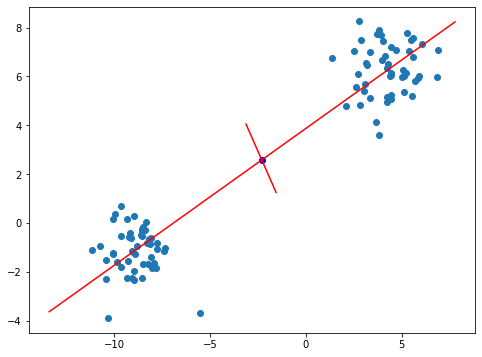

In [203]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], label='x')
x_l_t, x_h_t, y_l_t, y_h_t = pca_error_points(X)
plt.plot(
    [x_l_t[0], x_h_t[0]], 
    [x_l_t[1], x_h_t[1]], 
    color='red'
)
plt.plot(
    [y_l_t[0], y_h_t[0]], 
    [y_l_t[1], y_h_t[1]], 
    color='red'
)
plt.scatter(np.nanmean(X[:,0]), np.nanmean(X[:,1]), color='blue', alpha=1)

In [220]:
X = np.array([x for x in [(1240.0, 0.8871428571428571),
 (10.0, 0.430952380952381),
 (10.0, 0.4328571428571429),
 (1230.0, 0.8995238095238095),
 (10.0, 0.2823809523809524),
 (10.0, 0.3728571428571428),
 (1460.0, 0.8866666666666667),
 (1560.0, 0.8842857142857142),
 (1220.0, 0.8857142857142857),
 (None, None),
 (1400.0, 0.8890476190476191),
 (None, None),
 (1510.0, 0.9057142857142856),
 (10.0, 0.4276190476190476),
 (1250.0, 0.9147619047619048),
 (1380.0, 0.9123809523809524),
 (1510.0, 0.8919047619047619),
 (10.0, 0.3909523809523809),
 (10.0, 0.4028571428571428),
 (None, None),
 (1450.0, 0.8904761904761904),
 (10.0, 0.4238095238095238),
 (1360.0, 0.9104761904761904),
 (10.0, 0.3338095238095238),
 (1500.0, 0.9052380952380952),
 (1370.0, 0.8947619047619048),
 (1320.0, 0.8966666666666666),
 (None, None),
 (10.0, 0.4347619047619047),
 (None, None)] if x[0] is not None])

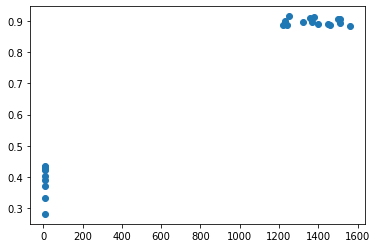

In [221]:
plt.scatter(X[:,0], X[:,1])

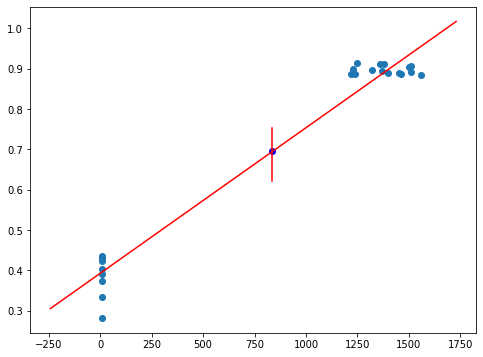

In [222]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], label='x')
x_l_t, x_h_t, y_l_t, y_h_t = pca_error_points(X)
plt.plot(
    [x_l_t[0], x_h_t[0]], 
    [x_l_t[1], x_h_t[1]], 
    color='red'
)
plt.plot(
    [y_l_t[0], y_h_t[0]], 
    [y_l_t[1], y_h_t[1]], 
    color='red'
)
plt.scatter(np.nanmean(X[:,0]), np.nanmean(X[:,1]), color='blue', alpha=1)

In [224]:
y_h_t[0]-y_l_t[0]

4.723744154944143e-05

Angle is non-zero, just *very* close to it.